In [1]:
# import OS module
import os
from fnmatch import fnmatch
import pandas as pd
import density_app.functions.density_calc as calc


final_data = pd.DataFrame({'Date': [],
                        'Cell Name': [],
                        'Temperature':[],
                        'Density':[],
                        #'Density Error':[],
                        'Density (with Paramagentic term)': [],
                        'Density (with para sanity check)': [],
                        '[Rb]_para1-[Rb]_para2': [],
                        #'Density Error (with Paramagentic term)': [],
                        #'Killian Value':[],
                        #'D1 Resonance':[],
                        #'D2 Resonance':[],
                        'Probe Beam':[] })

def get_info_from_fname(processed_filepath):
    #split the file path by / 
    fp_ary = str(processed_filepath).split('/')
    #take the last element of the array to get the file name
    #split that on . to separate extension from rest of name
    properties = fp_ary[-1].split('.')[0].split('_')
    #need to get the following params from the 
    col_date = properties[0]
    cell_name = properties[1].split('-')[1]
    temperature = properties[2].split('-')[1]
    wavelen = float(fp_ary[-3][:-2].replace('_','.'))
    return col_date, cell_name, float(temperature), wavelen


D1_res = 7.94768E-5
D2_res = 7.80032E-5
optical_length = 3.7



# Get the list of all files and directories
path = "/Users/eleanor/Desktop/DatatoReprocess/"

root = path
pattern = "*processed.csv"



for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file = os.path.join(path, name)   
            my_date, cellname, temp, wl = get_info_from_fname(file)
            wl = wl*10**(-7)
            bfield, rots, mae, std = calc.get_processed_data_from_csv(file)
            my_data = pd.DataFrame({"Magnetic Field (Gauss)": bfield,
                                       "Rotation (Radians)": rots, 
                                       "Rotation Standard Deviation": std})
            res = calc.get_my_data_no_file(my_date, cellname, temp, my_data, D1_res, D2_res, wl, optical_length, isPositive=False)
            final_data = pd.concat([final_data, res])


#put the calculations in a csv
output_file = 'density_with_paramag_term_comparison.csv'
final_data.to_csv(output_file)


In [1]:
# import OS module
import os
from fnmatch import fnmatch
import pandas as pd
import density_app.functions.density_calc as calc


final_data = pd.DataFrame({'Date': [],
                        'Cell Name': [],
                        'Temperature':[],
                        'Density':[],
                        'Density Error':[],
                        'Density (with Paramagentic term)': [],
                        'Density (with para sanity check)': [],
                        '[Rb]_para1-[Rb]_para2': [],
                        'Density Error (with Paramagentic term)': [],
                        'Killian Value':[],
                        'D1 Resonance':[],
                        'D2 Resonance':[],
                        'Probe Beam':[] })

def get_info_from_fname(processed_filepath):
    #split the file path by / 
    fp_ary = str(processed_filepath).split('/')
    #take the last element of the array to get the file name
    #split that on . to separate extension from rest of name
    properties = fp_ary[-1].split('.')[0].split('_')
    #need to get the following params from the 
    col_date = properties[0]
    cell_name = properties[1].split('-')[1]
    temperature = properties[2].split('-')[1]
    wavelen = float(fp_ary[-3][:-2].replace('_','.'))
    return col_date, cell_name, float(temperature), wavelen


D1_res = 7.94768E-5
D2_res = 7.80032E-5
optical_length = 3.7



# Get the list of all files and directories
path = "/Users/eleanor/Desktop/DatatoReprocess/9-13"

root = path
pattern = "*processed.csv"



for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file = os.path.join(path, name)   
            my_date, cellname, temp, wl = get_info_from_fname(file)
            wl = wl*10**(-7)
            bfield, rots, mae, std = calc.get_processed_data_from_csv(file)
            my_data = pd.DataFrame({"Magnetic Field (Gauss)": bfield,
                                       "Rotation (Radians)": rots, 
                                       "Rotation Standard Deviation": std})
            res = calc.get_my_data_no_file(my_date, cellname, temp, my_data, D1_res, D2_res, wl, optical_length, isPositive=False)
            final_data = pd.concat([final_data, res])


#put the calculations in a csv
output_file = '09132024_density_with_paramag_term_comparison.csv'
final_data.to_csv(output_file)

In [9]:
import pandas as pd

file = 'density_with_paramag_term.csv'
data = pd.read_csv(file)
temperature = 80.0

og_density =data.loc[data['Temperature']== temperature, 'Density'].to_numpy()
og_density_error = data.loc[data['Temperature']== temperature, 'Density Error'].to_numpy()

killian_density = data.loc[data['Temperature']== temperature, 'Killian Value']

paramag_density = data.loc[data['Temperature']== temperature, 'Density (with Paramagentic term)'].to_numpy()
paramag_density_error = data.loc[data['Temperature']== temperature, 'Density Error (with Paramagentic term)'].to_numpy()

probe_beam = data.loc[data['Temperature']== temperature, 'Probe Beam'].to_numpy()

comparison_data = pd.DataFrame({'Original Density':[], 
                                'Density with Paramagentic':[],
                                'Percent Difference':[],
                                'Probe Beam': []
                                })

for i in range(0,len(og_density)):
    den1 = og_density[i]
    den2 = paramag_density[i]
    percent_diff = 100*abs(den1-den2)/den1
    new_row = pd.DataFrame({'Original Density':[den1], 
                            'Density with Paramagentic':[den2],
                            'Percent Difference':[percent_diff],
                            'Probe Beam': [probe_beam[i]]
                            })
    #print(new_row)
    pd.concat([comparison_data, new_row]).reset_index(drop=True)

print(comparison_data)





Empty DataFrame
Columns: [Original Density, Density with Paramagentic, Percent Difference, Probe Beam]
Index: []


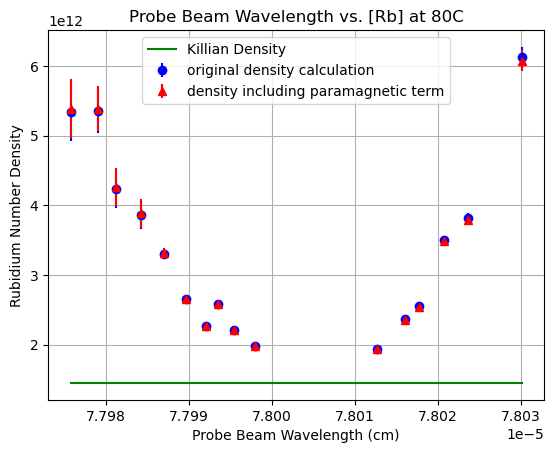

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file = '09132024_density_with_paramag_term_comparison.csv'
data_unsorted = pd.read_csv(file)
temperature = 80.0

data = data_unsorted.sort_values('Probe Beam')

og_density =data.loc[data['Temperature']== temperature, 'Density'].to_numpy()
og_density_error = data.loc[data['Temperature']== temperature, 'Density Error'].to_numpy()

killian_density = data.loc[data['Temperature']== temperature, 'Killian Value']

paramag_density = data.loc[data['Temperature']== temperature, 'Density (with Paramagentic term)'].to_numpy()
paramag_density_error = data.loc[data['Temperature']== temperature, 'Density Error (with Paramagentic term)'].to_numpy()

probe_beam = data.loc[data['Temperature']== temperature, 'Probe Beam'].to_numpy()

plt.grid(visible=True, which='both', axis='both')

plt.errorbar(x=probe_beam, y=og_density, yerr=og_density_error, color='blue', marker='o', linestyle='none', label = 'original density calculation')
plt.errorbar(x=probe_beam, y=paramag_density, yerr=paramag_density_error, color='red', marker='^', linestyle='none', label = 'density including paramagnetic term')
plt.plot(probe_beam, killian_density, 'g-', label = "Killian Density")
plt.title("Probe Beam Wavelength vs. [Rb] at %dC"%(temperature))
plt.legend(loc='upper center')
plt.xlabel("Probe Beam Wavelength (cm)")
plt.ylabel("Rubidium Number Density")
plt.show()

